# Introduction to Argoverse-forecasting

This is a simple tutorial that will show you how to interact with the Argoverse-forecasting dataset using our python package. See [github page](https://github.com/argoai/argoverse-api) for instructions on how to install the package.

Argoverse dataset can be download at [https://www.argoverse.org](https://www.argoverse.org)

## Data loading 

First we need to create argoverse loader. 

In [1]:
from argoverse.data_loading.argoverse_forecasting_loader import ArgoverseForecastingLoader

##set root_dir to the correct path to your dataset folder
root_dir = '../../forecasting_sample/data/'
root_dir = '/mnt/data/Argoverse1.1/test_obs/data'
# root_dir = '/mnt/data/Argoverse1.1/train/data'
# root_dir = '/mnt/data/Argoverse1.1/val/data'

afl = ArgoverseForecastingLoader(root_dir)

print('Total number of sequences:',len(afl))

Total number of sequences: 78143


In [2]:
print(afl[4])

Seq : /mnt/data/Argoverse1.1/test_obs/data/12379.csv
        ----------------------
        || City: MIA
        || # Tracks: 37
        ----------------------


One way to go through each log in our dataset is by iterating through our data loader. For example, we can see statistics for each log with simple iteration and printing.

In [3]:
count = 0
for argoverse_forecasting_data in (afl):
    print(argoverse_forecasting_data)
    count += 1
    if count > 5:
        break

Seq : /mnt/data/Argoverse1.1/test_obs/data/7935.csv
        ----------------------
        || City: MIA
        || # Tracks: 46
        ----------------------
Seq : /mnt/data/Argoverse1.1/test_obs/data/37760.csv
        ----------------------
        || City: MIA
        || # Tracks: 32
        ----------------------
Seq : /mnt/data/Argoverse1.1/test_obs/data/6043.csv
        ----------------------
        || City: PIT
        || # Tracks: 110
        ----------------------
Seq : /mnt/data/Argoverse1.1/test_obs/data/34333.csv
        ----------------------
        || City: PIT
        || # Tracks: 27
        ----------------------
Seq : /mnt/data/Argoverse1.1/test_obs/data/12379.csv
        ----------------------
        || City: MIA
        || # Tracks: 37
        ----------------------
Seq : /mnt/data/Argoverse1.1/test_obs/data/18853.csv
        ----------------------
        || City: MIA
        || # Tracks: 25
        ----------------------


You can also get all the track_ids for a sequence.

In [4]:
argoverse_forecasting_data = afl[0]
print(argoverse_forecasting_data.track_id_list)

['00000000-0000-0000-0000-000000000000', '00000000-0000-0000-0000-000000037578', '00000000-0000-0000-0000-000000038776', '00000000-0000-0000-0000-000000038831', '00000000-0000-0000-0000-000000038833', '00000000-0000-0000-0000-000000038948', '00000000-0000-0000-0000-000000038955', '00000000-0000-0000-0000-000000038963', '00000000-0000-0000-0000-000000039006', '00000000-0000-0000-0000-000000039088', '00000000-0000-0000-0000-000000039106', '00000000-0000-0000-0000-000000039108', '00000000-0000-0000-0000-000000039110', '00000000-0000-0000-0000-000000039113', '00000000-0000-0000-0000-000000039114', '00000000-0000-0000-0000-000000039119', '00000000-0000-0000-0000-000000039166', '00000000-0000-0000-0000-000000039170', '00000000-0000-0000-0000-000000039179', '00000000-0000-0000-0000-000000039212', '00000000-0000-0000-0000-000000039216', '00000000-0000-0000-0000-000000039219', '00000000-0000-0000-0000-000000039224', '00000000-0000-0000-0000-000000039229', '00000000-0000-0000-0000-000000039230',

## Visualizing sequences

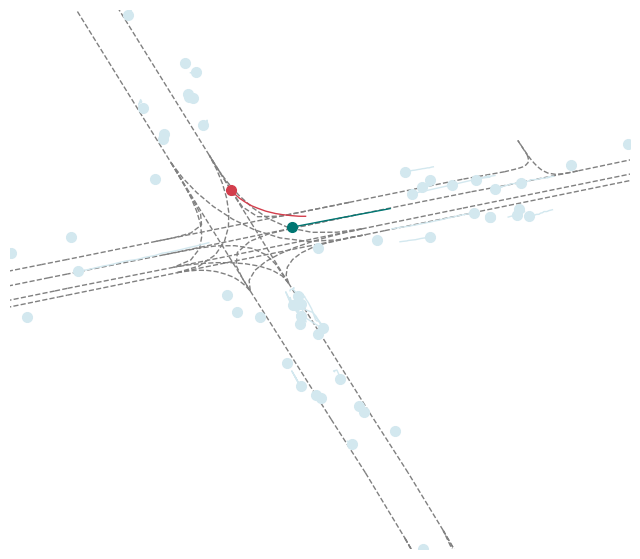

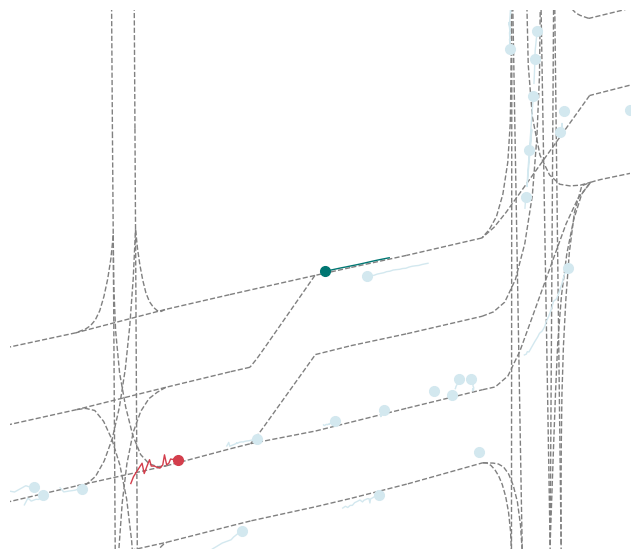

In [5]:
from argoverse.visualization.visualize_sequences import viz_sequence
seq_path = f"{root_dir}/2645.csv"
viz_sequence(afl.get(seq_path).seq_df, show=True)
seq_path = f"{root_dir}/3828.csv"
viz_sequence(afl.get(seq_path).seq_df, show=True)

## Using map_api

Getting candidate centerlines for the agent's trajectory is a simple function call. Below we use the first 2 secs of the trajectory to compute candidate centerlines for the next 3 secs.

/home/ldl/miniconda3/envs/simpl/lib/python3.8/site-packages/shapely/linear.py:88: RuntimeWarning: invalid value encountered in line_locate_point
  return lib.line_locate_point(line, other)


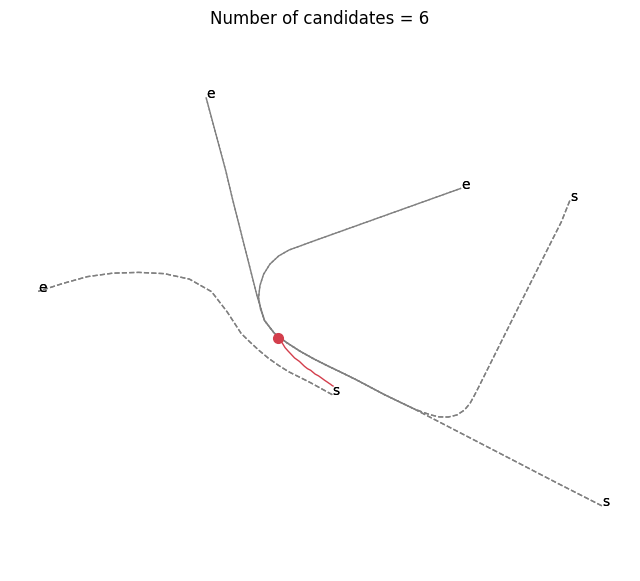

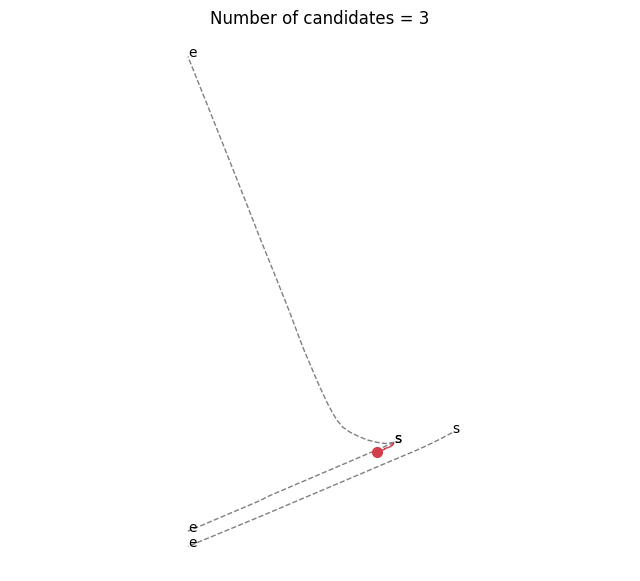

In [6]:
from argoverse.map_representation.map_api import ArgoverseMap

avm = ArgoverseMap()

obs_len = 20

index = 2
seq_path = afl.seq_list[index]
agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]
candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, afl[index].city, viz=True)

index = 3
seq_path = afl.seq_list[index]
agent_obs_traj = afl.get(seq_path).agent_traj[:obs_len]
candidate_centerlines = avm.get_candidate_centerlines_for_traj(agent_obs_traj, afl[index].city, viz=True)

So is getting the lane direction of the trajectory's coordinates.

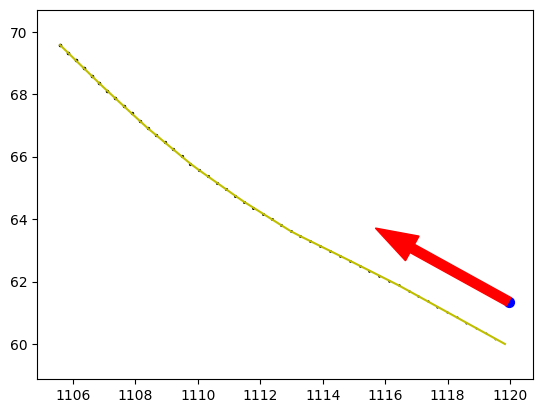

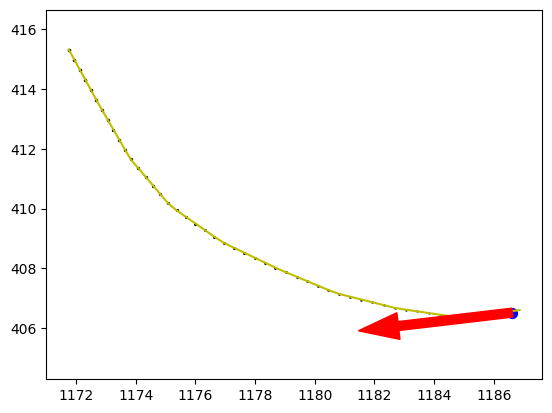

In [7]:
index = 2
seq_path = afl.seq_list[index]
agent_traj = afl.get(seq_path).agent_traj
lane_direction = avm.get_lane_direction(agent_traj[0], afl[index].city, visualize=True)

index = 3
seq_path = afl.seq_list[index]
agent_traj = afl.get(seq_path).agent_traj
lane_direction = avm.get_lane_direction(agent_traj[0], afl[index].city, visualize=True)